 # Assignment 2
* Students:
    * Davíð Freyr Björnsson
    * Eric Guldbrand
* Time spent per person: 12 hours


 **1.** A company is considering using a system that will allow management to track staff behaviour in real-time, gather data on when and who they email,
who accesses and edits files, and who meets whom when. The HR (human resources, or personnel) department at the company is in favour of introducing this new system and believes it will benefit the staff at the company. The company's management is also in favour. Discuss whether introducing this system raises potential ethical issues.

One useful approach to this issue is to look
at the benefits and costs that the stakeholders of the company would incur.
This system would benefit HR and the company's management in several ways.
Good communication within a company is vital for a company's success.
The HR department could see if there are individuals or groups within
the company that should be communicating but are not. They could then
potentially rectify the situation before the lack of communication has adverse
consequences.

This data collection would also beneficial for getting some
indication of who's productive and who's not. Workers who are productive
tend to access more files, email and meet more people. But this is an imperfect
indicator of performance so more in-depth analysis of an individuals performance
would have to be performed as well.

But from the standpoint of the individual worker, the introduction of this
system may not seem like a step in the right direction. The feeling of someone
constantly looking over your shoulder can give the impression that the company
doesn't trust you to do a good enough job on your own. Put in another way; if the comapny's interest don't align well enough with yours, you will probably feel like you are not on the same team then as the management and HR. That would have a bad effect on the company's morale and performance.

It then seems that HR and management have only something to gain and others
within the company have only something to lose. But this all depends on how
this system will be implemented and used. The company's management and HR could
have a policy of trusting the workers to do a good job (i.e. not looking and
analyzing the data on a regular basis) but using it only in cases of dispute,
where it's not clear who's responsible. This would benefit HR and management
but also employees, as more data is beneficial in the case of disputes.

The final outcome of the introduction of this system comes down to whether or not we can trust the HR department and the company's management
not to misuse the data. As such, there needs to be clear definitions of how the data will be used or employees could come to see unreasonable many negative effects in the future.

In [1]:
# All properties with their room count and living area listed are included.

from lxml import html
from lxml import etree
import requests
from io import StringIO, BytesIO
import re

houseSizes = []
housePrices = []
houseRooms = []

parser = etree.HTMLParser(encoding="UTF-8")

# Iterate over the pagination. How many pages to go through is set manually.
for pageIndex in range(1, 11):
    # Request the current page and parse it
    url = 'https://www.hemnet.se/salda/bostader?location_ids%5B%5D=474180&page=' + str(pageIndex) + '&sold_age=all'
    data = requests.get(url).text

    tree = etree.parse(StringIO(data), parser)

    # List of all property divs on the current page
    propertyListings = tree.xpath('//div[@class="sold-property-listing"]')

    for property in propertyListings:
        # Select element that has sizes and rooms
        sizesRooms = property.xpath('./div[@class="sold-property-listing__size"]/div[@class="clear-children"]/div[@class="sold-property-listing__subheading sold-property-listing--left"]/text()')
        # Some properties doesn't have this exact html layout
        # because they have no houses built on them. Skip those.
        if (len(sizesRooms) == 0):
            continue
        sizesRooms = list(map(lambda x: re.sub("\xa0", "", x), sizesRooms))
        # Get the living area and convert to integer
        size = list(map(lambda x: re.findall("([0-9]*,*[0-9]*)m²", x), sizesRooms))[0][0]
        size = round(float(size.replace(",", ".")))

        def calcRoomCount(element):
            finds = re.findall("([0-9]*)rum", element)
            if (len(finds) == 0):
                 return "0"
            return finds[0]

        # Get room count
        rooms = list(map(calcRoomCount, sizesRooms))[0]
        rooms = int(round(float(rooms)))
        # If there were 0 rooms, lets ignore this data point
        if (rooms == 0):
            continue

        # Get the price of this property
        price = property.xpath('./div[@class="sold-property-listing__price"]/div[@class="clear-children"]/span[@class="sold-property-listing__subheading sold-property-listing--left"]/text()')
        price = price[0]
        price = re.sub("\xa0", "", price)
        price = re.sub("\n(.*)Slutpris ", "", price)
        price = re.sub(" kr\n", "", price)

        housePrices.append(int(price))
        houseSizes.append(int(size))
        houseRooms.append(int(rooms))

if (len(housePrices) != len(houseSizes) or len(housePrices) != len(houseRooms)):
    print("Assert array lengths failed.", len(housePrices), len(houseSizes), len(houseRooms))


We decided to collect data for all properties listed as sold in Landvetter at anytime, as listed by hemnet.se. Properties without anything built on them and properties without floor area information were excluded.


a. What are the values of the slope and intercept of the regression line?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a pandas dataframe
data = {'Area': houseSizes, 'Price': housePrices}
df = pd.DataFrame(data)
df


,Area,Price
0,102,4300000
1,139,5250000
2,170,4950000
3,75,4300000
4,124,4135000
5,111,3800000
6,124,5725000
7,160,5500000
8,66,3000000
9,83,3160000


The value of the slope is 0.8
The value of the coefficient is 0.03


Text(0, 0.5, 'Price (Million SEK)')

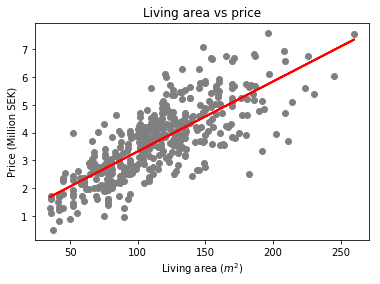

In [3]:
# Prepare the data
df['Price'] = df['Price']/1000000
X = df['Area'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)


# Perform linear regression using Scikit-learn
regressor = LinearRegression()
regressor.fit(X, y)

print("The value of the slope is", round(regressor.intercept_[0],2))
print("The value of the coefficient is", round(regressor.coef_[0][0],2))

# Let's predict the prices based on the living area
y_pred = regressor.predict(X)
plt.scatter(X, y, color = 'gray');
plt.plot(X, y_pred, color = 'red', linewidth = 2);
plt.title('Living area vs price')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Price (Million SEK)')


b. Use this model to predict the selling prices of houses which have living area
100 $m^2$, 150 $m^2$ and 200 $m^2$.


In [4]:
print("The predicted selling price (in millions of SEK) of a house with a living area 100 m^2 is",
round(regressor.predict([[100]])[0][0]), 2)

print("The predicted selling price (in millions of SEK) of a house with a living area 150 m^2 is",
round(regressor.predict([[150]])[0][0]), 2)

print("The predicted selling price (in millions of SEK) of a house with a living area 200 m^2 is",
round(regressor.predict([[200]])[0][0]), 2)


The predicted selling price (in millions of SEK) of a house with a living area 100 m^2 is 3.0 2
The predicted selling price (in millions of SEK) of a house with a living area 150 m^2 is 5.0 2
The predicted selling price (in millions of SEK) of a house with a living area 200 m^2 is 6.0 2


c. Draw a residual plot.


,X,res
count,438.000000,4.380000e+02
mean,113.369863,-2.991012e-16
std,39.787079,8.130864e-01
min,35.000000,-2.890542e+00
25%,82.250000,-5.275541e-01
50%,110.000000,3.334953e-02
75%,135.000000,4.715887e-01
max,260.000000,2.542487e+00


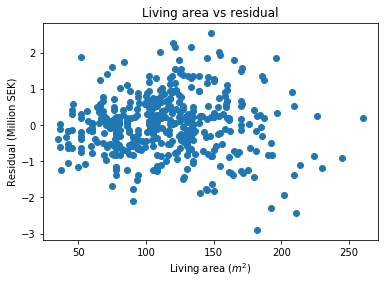

In [5]:
y_residual = y - y_pred
plt.scatter(X, y_residual)
plt.title('Living area vs residual')
plt.xlabel('Living area ($m^2$)')
plt.ylabel('Residual (Million SEK)')

frame = pd.DataFrame({'X': X.squeeze(), 'res': y_residual.squeeze()})
frame.describe()


d. Discuss the results, and how the model could be improved.

Our linear regression model tends to underestimate the prices of larger houses. This can be clearly seen in the residual plot. A possible reason for this is that larger houses may tend to be built where the price of land is low, but the parameters of our linear regression model are more influenced by smaller houses (less than $140 m^2$) than larger houses (greater than $140 m^2$). As such the "location value" is trained for smaller houses in more central locations.

An improvement for the model could then be to also consider some measurement of location or land value, or including more large houses in the training set. It could also be considered to only look at a specific type of house, such as villas, in comparison to other types of housing.

 ## Normal distribution of residuals
An important assumption of the linear regression model is that the residuals are normally distributed. Let's plot a histogram:


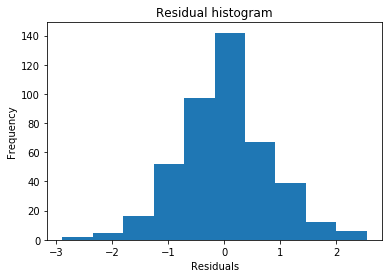

In [6]:
plt.hist(y_residual);
plt.xlabel("Residuals");
plt.ylabel("Frequency");
plt.title("Residual histogram");


The residuals seem to be normally distributed. Let's confirm that by conducting the Shapiro-Wilk, D’Agostino’s K^2 and Anderson-Darling test. The null hypothesis in all three test is that the data comes from a normal distribution.
The Shapiro-Wilk test is best suited for datasets with a thousand observations or less (smaller datasets).
The $D’Agostino’s K^2$ test looks toward the kurtosis and skewness to determine if the data distribution departs from the normal distribution. An interesting feature of the Anderson-Darling test is that it returns a list of p-values that can be compared to the threshold value.


In [7]:
from scipy.stats import shapiro
statShap, pShap = shapiro(y_residual)
print("The p-value for the Shapiro-Wilk test is: ", round(pShap, 4));

from scipy.stats import normaltest
statDag, pDag = normaltest(y_residual)
print("The p-value for the D’Agostino’s K^2 test is: ", round(pDag[0], 4));

from scipy.stats import anderson
pAnd = anderson(y_residual)
print("The results of the Anderson Darling test are: ")

for i in range(len(pAnd)):
    print("For the significance level of", pAnd.significance_level[i], "%", "the corresponding p-value is", pAnd.critical_values[i])


The p-value for the Shapiro-Wilk test is:  0.0331
The p-value for the D’Agostino’s K^2 test is:  0.0929
The results of the Anderson Darling test are: 
For the significance level of 15.0 % the corresponding p-value is 0.571
For the significance level of 10.0 % the corresponding p-value is 0.65
For the significance level of 5.0 % the corresponding p-value is 0.78


Both the Shapiro-Wilk test and the D'Agostino's K^2 test reject the null hypothesis at a significance level of 5% that the data comes from a normal distribution. But the Anderson-Darling test fails to reject the null hypothesis at a significance level of 15%, 10% and 5%. This suggests that the distribution of the residuals has some features of a normal distribution.


__3.__ Use a confusion matrix and 5-fold cross-validation to evaluate the use logistic regression to classify the iris data set.


In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

iris = load_iris()

X = iris.data
y = iris.target
class_names = iris.target_names

# Check if there are equal number of instances in each class
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))


{0: 50, 1: 50, 2: 50}


Since there are equal number of instances in each class, no normalization of the data is needed.


Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  2]
 [ 0  3 48]]


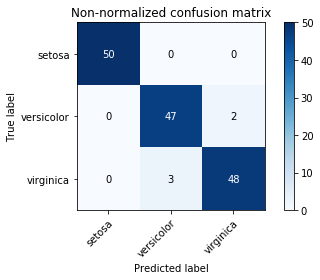

In [9]:
def kfoldEval(classifier, k = 5):
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=1)
    y_pred_total = []
    y_test_total = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #plot_confusion_matrix(y_test, y_pred, classes=class_names,title='Non-normalized confusion matrix');
        y_pred_total.extend(y_pred)
        y_test_total.extend(y_test)
    return {"predictions": y_pred_total, "tests": y_test_total}

evaluation = kfoldEval(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='multinomial'), 5)
plot_confusion_matrix(evaluation['predictions'], evaluation['tests'], classes=class_names,title='Non-normalized confusion matrix');


__4.__ Comparing classification models

Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  2]
 [ 0  3 48]]
0.967 0.967 0.967 0.967
Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  1]
 [ 0  4 49]]
0.967 0.967 0.967 0.967
Confusion matrix, without normalization
[[50  0  0]
 [ 0 46  1]
 [ 0  4 49]]
0.967 0.967 0.967 0.967
Confusion matrix, without normalization
[[50  0  0]
 [ 0 47  1]
 [ 0  3 49]]
0.973 0.973 0.973 0.973


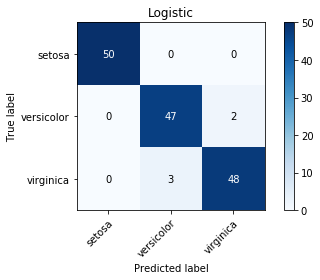

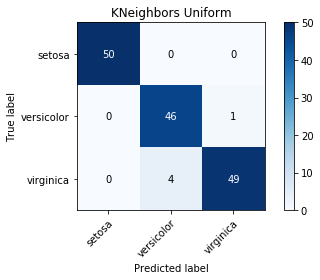

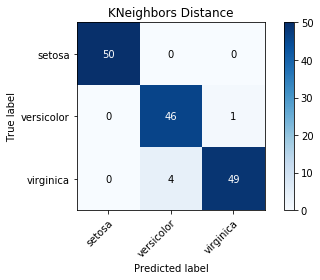

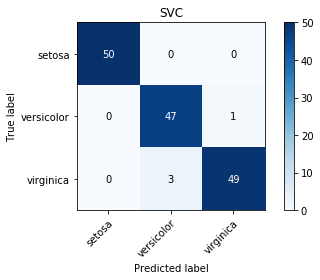

In [10]:
listOfClassifiers = [
(LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='multinomial'), 'Logistic'),
(KNeighborsClassifier(weights='uniform'), 'KNeighbors Uniform'),  (KNeighborsClassifier(weights='distance'), 'KNeighbors Distance'),
(SVC(gamma='auto'), 'SVC')
]

for cdata in listOfClassifiers:
    classifier = cdata[0]
    eval = kfoldEval(classifier, 5)
    plot_confusion_matrix(eval['predictions'], eval['tests'], classes=class_names, title=cdata[1])

    cm = np.array(confusion_matrix(eval['predictions'], eval['tests']))
    true_pos = np.sum(np.diag(cm))
    false_pos = np.sum(np.sum(cm, axis=0)) - true_pos
    false_neg = np.sum(np.sum(cm, axis=1)) - true_pos

    # Different types of measurement.
    # Turns out that for multiclass confusion matrices, they are all the same.
    multi_class_accuracy = true_pos / np.sum(cm)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    f1 = 2 * true_pos / (2 * true_pos + false_pos + false_neg)
    print(round(precision, 3), round(recall, 3), round(f1, 3), round(multi_class_accuracy, 3))
    #print(true_pos, false_pos, false_neg)



The confusion matrices show that the different models perform quite similiarily, and all quite well, on the iris dataset. The KNeighbors classifiers just make one misclassification more than the other classifiers.

All misclassifications are between versicolor and virginica. Setosa is always correctly classified, and no other species is wrongly classified as setosa.

In terms of accuracy the logistic regression and SVC classifiers perform the best and have an accuracy of $96.7\%$, while the KNeighbors classifiers perform slightly worse with accuracy of $96\%$.


 ## Bibliography
(2019, August 8). A Gentle Introduction to Normality Tests in Python. Retrieved from https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/